I. EDA<br>
 1. 종류<br>
  - 저항성 : 이상치에 영향을 받는 정도
  - 잔차 해석 : 관찰값들이 주 경향으로 벗어난 정도와 원인 탐색
  - 자료 재표현 : 변수를 적당항 척도로 바꾸기
  - 현시성 : 데이터 시각화<br>
   → 현재 보유 중인 데이터는 이미지 데이터로 "현시성"을 통해서만 분석 진행 예정

2. 목적
 - 시각화를 통해 산출된 그래프를 가지고 정상 컨테이너와 파손된 컨테이너를 구분할 수 있을까?

**i. 패키지 선언하기**



In [ ]:
# 필요 라이브러리 가져오기
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

 - Jupyter Notebook에서 matplotlib의 결과를 실행한 브라우저에서 바로 볼 수 있게 함

In [ ]:
%matplotlib inline

**ii. 데이터 확인하기**

 1. 정상 컨테이너로 분류된 이미지

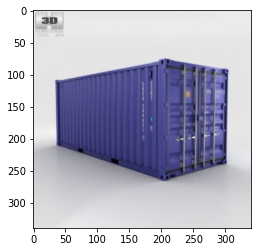

In [ ]:
# 정상컨테이너 사진 한장 미리보기
img = cv2.imread('n_con_159.jpg')
plt.imshow(img)

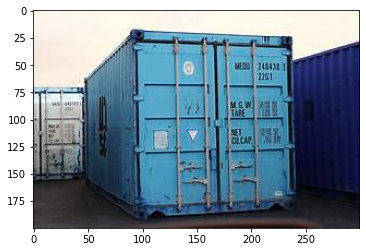

In [ ]:
# 정상컨테이너 사진 미리보기 두장
img1_1 = cv2.imread('n_con_131.jpg')
plt.imshow(img1_1)

 2. 파손된 컨테이너 이미지 확인하기

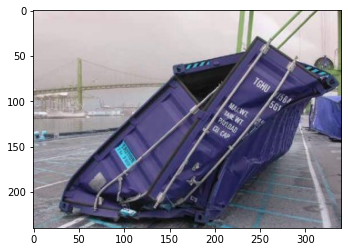

In [ ]:
# 파손된 컨테이너 사진 한장 미리보기
img2 = cv2.imread('d_con_035.jpg')
plt.imshow(img2)

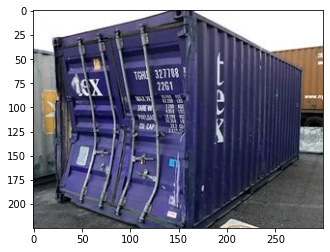

In [ ]:
# 파손된 컨테이너 사진 미리보기 2
img2_1 = cv2.imread('d_con_089.jpg')
plt.imshow(img2_1)

 3. 이미지 데이터의 구성 확인하기
  - 기존 이미지의 컬러채널 순서인 RGB와 달리 OpenCV는 BGR로 확인

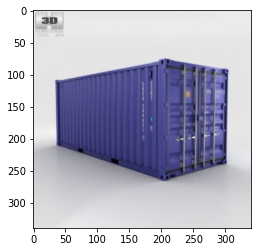

In [ ]:
img = cv2.imread('n_con_159.jpg')
plt.imshow(img)

In [ ]:
print(img.shape)  # 가로, 세로, 채널(BRG)
print(img.dtype)  # 사진 type

(200, 268, 3)
uint8


In [ ]:
print(img[:,:,0].mean())  # 0번째 채널(Blue)의 평균
print(img[:,:,1].mean())  # 1번째 채널(Green)의 평균
print(img[:,:,2].mean())  # 2번째 채널(Red)의 평균

149.07192164179105
147.5929291044776
144.79035447761194


In [ ]:
dst=cv2.resize(img, dsize=(100,100)) # 사이즈 변경하기

In [ ]:
dst.shape  # 변경된 사이즈

(100, 100, 3)

In [ ]:
dst2 = cv2.split(img)   # BGR기준 numpy로 img 분류하기
dst2

[array([[232, 232, 232, ..., 243, 243, 243],
        [232, 232, 232, ..., 243, 243, 243],
        [232, 232, 232, ..., 243, 243, 243],
        ...,
        [171, 172, 172, ..., 180, 182, 179],
        [166, 166, 167, ..., 183, 181, 180],
        [167, 167, 168, ..., 178, 177, 177]], dtype=uint8),
 array([[217, 217, 217, ..., 236, 236, 236],
        [217, 217, 217, ..., 236, 236, 236],
        [217, 217, 217, ..., 236, 236, 236],
        ...,
        [186, 187, 187, ..., 189, 189, 188],
        [182, 182, 183, ..., 193, 190, 190],
        [183, 183, 184, ..., 188, 187, 187]], dtype=uint8),
 array([[208, 208, 208, ..., 233, 233, 233],
        [208, 208, 208, ..., 233, 233, 233],
        [208, 208, 208, ..., 233, 233, 233],
        ...,
        [202, 203, 203, ..., 198, 198, 197],
        [199, 199, 200, ..., 203, 200, 200],
        [200, 200, 201, ..., 198, 197, 197]], dtype=uint8)]

In [ ]:
np.set_printoptions(threshold=sys.maxsize)     # dst2[2] 전체보기
print(dst2[2])

[[208 208 208 209 209 209 209 209 209 210 210 210 210 210 210 211 211 211
  211 211 211 212 212 212 213 213 213 213 213 213 214 214 213 213 213 213
  213 213 214 214 214 214 214 214 214 215 215 215 215 216 216 216 216 216
  216 217 217 217 217 217 217 218 218 218 217 217 218 218 218 218 218 218
  219 219 219 219 219 219 220 220 221 221 221 221 221 222 222 222 222 222
  222 222 223 223 224 224 226 225 223 224 223 225 225 224 223 216 219 232
  216 225 226 220 225 230 227 223 226 226 223 224 230 230 227 228 223 223
  232 229 227 227 228 228 228 228 228 228 228 228 228 228 228 228 228 228
  228 228 228 228 228 229 229 229 229 229 229 229 229 229 229 229 231 231
  231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231
  231 232 232 232 232 232 232 232 232 232 232 232 233 233 233 233 233 233
  234 234 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 232 232 232 232 232 232 232 232 232 232
  232 232 232 232 232 232 233 233 233 

**iii. 히스토그램 분석**

1. Blue Channel 비교

In [ ]:
# 정상컨테이너 B성분
hist1=cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0,256])

In [ ]:
sum(hist1)

array([53600.], dtype=float32)

In [ ]:
hist1=hist1.flatten()

<function matplotlib.pyplot.show>

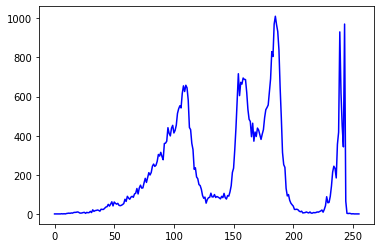

In [ ]:
plt.plot(hist1, color='b')
plt.show

<function matplotlib.pyplot.show>

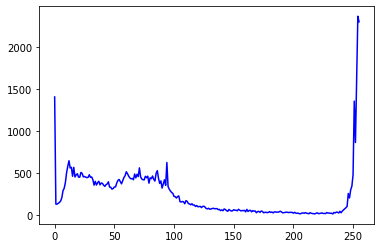

In [ ]:
# 정상컨테이너2 B 성분
hist4=cv2.calcHist(images=[img1_1], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist4=hist4.flatten()
plt.plot(hist4, color='b')
plt.show

<function matplotlib.pyplot.show>

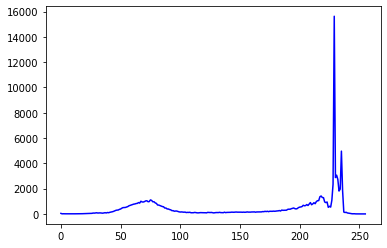

In [ ]:
# 파손컨테이너 B 성분
hist4=cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist4=hist4.flatten()
plt.plot(hist4, color='b')
plt.show

<function matplotlib.pyplot.show>

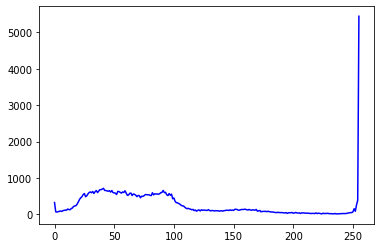

In [ ]:
# 파손컨테이너 B 성분2
hist4=cv2.calcHist(images=[img2_1], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist4=hist4.flatten()
plt.plot(hist4, color='b')
plt.show

2. Green Channel 비교

<function matplotlib.pyplot.show>

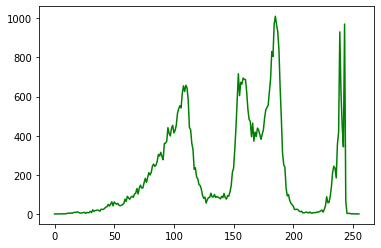

In [ ]:
# 정상컨테이너 G성분
hist2=cv2.calcHist(images=[img], channels=[1], mask=None, histSize=[256], ranges=[0,256])
hist2=hist2.flatten()
plt.plot(hist1, color='g')
plt.show

<function matplotlib.pyplot.show>

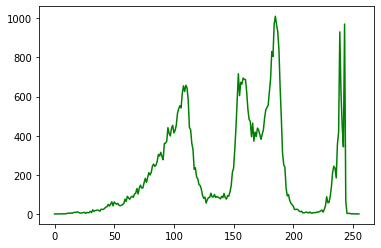

In [ ]:
# 정상컨테이너2 G성분
hist2=cv2.calcHist(images=[img1_1], channels=[1], mask=None, histSize=[256], ranges=[0,256])
hist2=hist2.flatten()
plt.plot(hist1, color='g')
plt.show

<function matplotlib.pyplot.show>

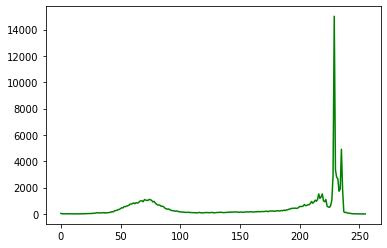

In [ ]:
# 파손컨테이너 G 성분
hist5=cv2.calcHist(images=[img], channels=[1], mask=None, histSize=[256], ranges=[0,256])
hist5=hist5.flatten()
plt.plot(hist5, color='g')
plt.show

<function matplotlib.pyplot.show>

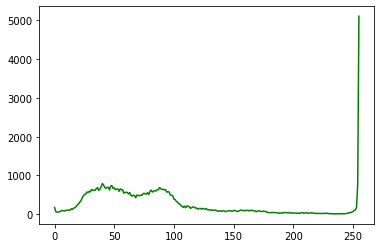

In [ ]:
# 파손컨테이너2 G 성분
hist5=cv2.calcHist(images=[img2_1], channels=[1], mask=None, histSize=[256], ranges=[0,256])
hist5=hist5.flatten()
plt.plot(hist5, color='g')
plt.show

3. Red Channel 비교

<function matplotlib.pyplot.show>

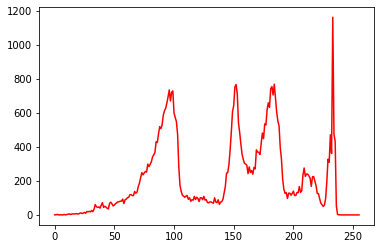

In [ ]:
# 정상컨테이너 R성분
hist3=cv2.calcHist(images=[img], channels=[2], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist3, color='r')
plt.show

<function matplotlib.pyplot.show>

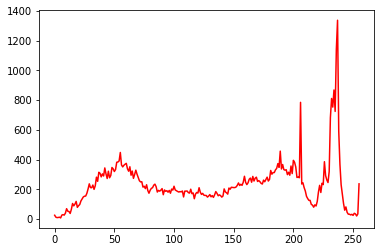

In [ ]:
# 정상컨테이너2 R성분
hist3=cv2.calcHist(images=[img1_1], channels=[2], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist3, color='r')
plt.show

<function matplotlib.pyplot.show>

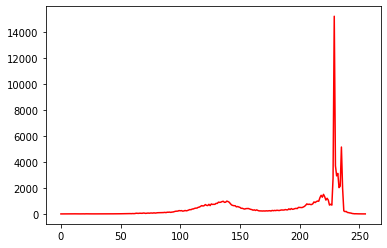

In [ ]:
# 파손컨테이너 R 성분
hist6=cv2.calcHist(images=[img], channels=[2], mask=None, histSize=[256], ranges=[0,256])
hist6=hist6.flatten()
plt.plot(hist6, color='r')
plt.show

<function matplotlib.pyplot.show>

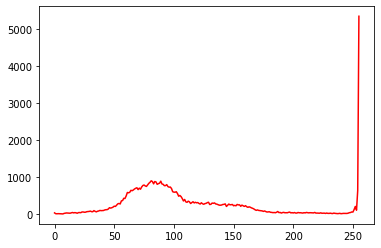

In [ ]:
# 파손컨테이너2 R 성분
hist6=cv2.calcHist(images=[img2_1], channels=[2], mask=None, histSize=[256], ranges=[0,256])
hist6=hist6.flatten()
plt.plot(hist6, color='r')
plt.show

iv. 데이터 보유 현황

In [ ]:
X = np.load('ml_dnn_con_X.npy')
Y = np.load('ml_dnn_con_Y.npy')
XY = np.load('cnn_con_X.npy')

In [ ]:
print('input의 행렬: ', X.shape)
print('target의 행렬: ', Y.shape)
print('target의 클래스:', np.unique(Y))

input의 행렬:  (576, 65536)
target의 행렬:  (576, 1)
target의 클래스: [0. 1.]


In [ ]:
Y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
 y2 = 0
 y3 = 0
 
 for i in range(len(Y)) :
   if Y[i] == [[0.]] :
     y2 += 1
   else :
     y3 += 1

In [ ]:

print(y2,y3)

277 299


In [ ]:

label = ['normal','damaged' ]
index = (y3, y2)

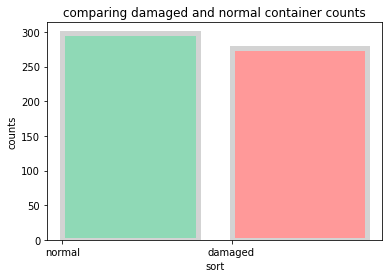

In [ ]:
plt.bar(label, index, color=['#8fd9b6','#ff9999'], align='edge', edgecolor='lightgray', 
        linewidth='5')
plt.title('comparing damaged and normal container counts')
plt.xlabel('sort')
plt.ylabel('counts')
plt.xticks(label,fontsize = 10, rotation=0)
plt.show()

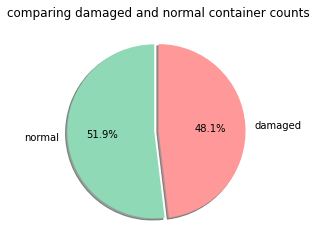

In [ ]:
ratio = index
labels = label
explode= [ 0.05, 0]
colors = [ '#8fd9b6','#ff9999']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=True,
        explode = explode, shadow=True, colors=colors)
plt.title('comparing damaged and normal container counts')
plt.show()